In [1]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master'\
    '/data/dirtydevil.txt'
df = pd.read_csv(url, skiprows=lambda num: num <34 or num == 35,
                 sep='\t')
def tweak_river(df_):
    return (df_
 .assign(datetime=pd.to_datetime(df_.datetime))
 .rename(columns={'144166_00060': 'cfs',
                  '144167_00065': 'gage_height'})
 .set_index('datetime')
)

/home/matt/envs/menv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
dd = tweak_river(df)
dd

,agency_cd,site_no,tz_cd,cfs,144166_00060_cd,gage_height,144167_00065_cd
datetime,,,,,,,
2001-05-07 01:00:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:15:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:30:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:45:00,USGS,9333500,MDT,70.00,A:[91],NaN,NaN
2001-05-07 02:00:00,USGS,9333500,MDT,70.00,A:[91],NaN,NaN
...,...,...,...,...,...,...,...
2020-09-28 08:30:00,USGS,9333500,MDT,9.53,P,6.16,P
2020-09-28 08:45:00,USGS,9333500,MDT,9.20,P,6.15,P
2020-09-28 09:00:00,USGS,9333500,MDT,9.20,P,6.15,P


In [3]:
dd.tz_cd

datetime
2001-05-07 01:00:00    MDT
2001-05-07 01:15:00    MDT
2001-05-07 01:30:00    MDT
2001-05-07 01:45:00    MDT
2001-05-07 02:00:00    MDT
                      ... 
2020-09-28 08:30:00    MDT
2020-09-28 08:45:00    MDT
2020-09-28 09:00:00    MDT
2020-09-28 09:15:00    MDT
2020-09-28 09:30:00    MDT
Name: tz_cd, Length: 539305, dtype: object

In [4]:
def tweak_river(df_):
    return (df_
      .assign(datetime=lambda df_:
          pd.to_datetime(df_.datetime + " " +
              df_.tz_cd.str.replace('MST', '-0700')
                 .str.replace('MDT', '-0600'),
              format='%Y-%m-%d %H:%M %z', utc=True))
      .rename(columns={'144166_00060': 'cfs',
                       '144167_00065': 'gage_height'})
      .set_index('datetime')
    )

In [5]:
def to_america_denver_time(df_, time_col, tz_col):
    return (df_
            .assign(**{tz_col: df_[tz_col].replace('MDT', 'MST7MDT')})
            .groupby(tz_col)
            [time_col]
            .transform(lambda s: pd.to_datetime(s)
                .dt.tz_localize(s.name, ambiguous=True)
                .dt.tz_convert('America/Denver'))
           )

In [6]:
def tweak_river(df_):
    return (df_
      .assign(datetime=to_america_denver_time(df_, 'datetime',
              'tz_cd'))
      .rename(columns={'144166_00060': 'cfs',
                       '144167_00065': 'gage_height'})
      .set_index('datetime')
     )

In [7]:
dd = tweak_river(df)

In [8]:
dd

,agency_cd,site_no,tz_cd,cfs,144166_00060_cd,gage_height,144167_00065_cd
datetime,,,,,,,
2001-05-07 01:00:00-06:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:15:00-06:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:30:00-06:00,USGS,9333500,MDT,71.00,A:[91],NaN,NaN
2001-05-07 01:45:00-06:00,USGS,9333500,MDT,70.00,A:[91],NaN,NaN
2001-05-07 02:00:00-06:00,USGS,9333500,MDT,70.00,A:[91],NaN,NaN
...,...,...,...,...,...,...,...
2020-09-28 08:30:00-06:00,USGS,9333500,MDT,9.53,P,6.16,P
2020-09-28 08:45:00-06:00,USGS,9333500,MDT,9.20,P,6.15,P
2020-09-28 09:00:00-06:00,USGS,9333500,MDT,9.20,P,6.15,P


<AxesSubplot:xlabel='datetime'>

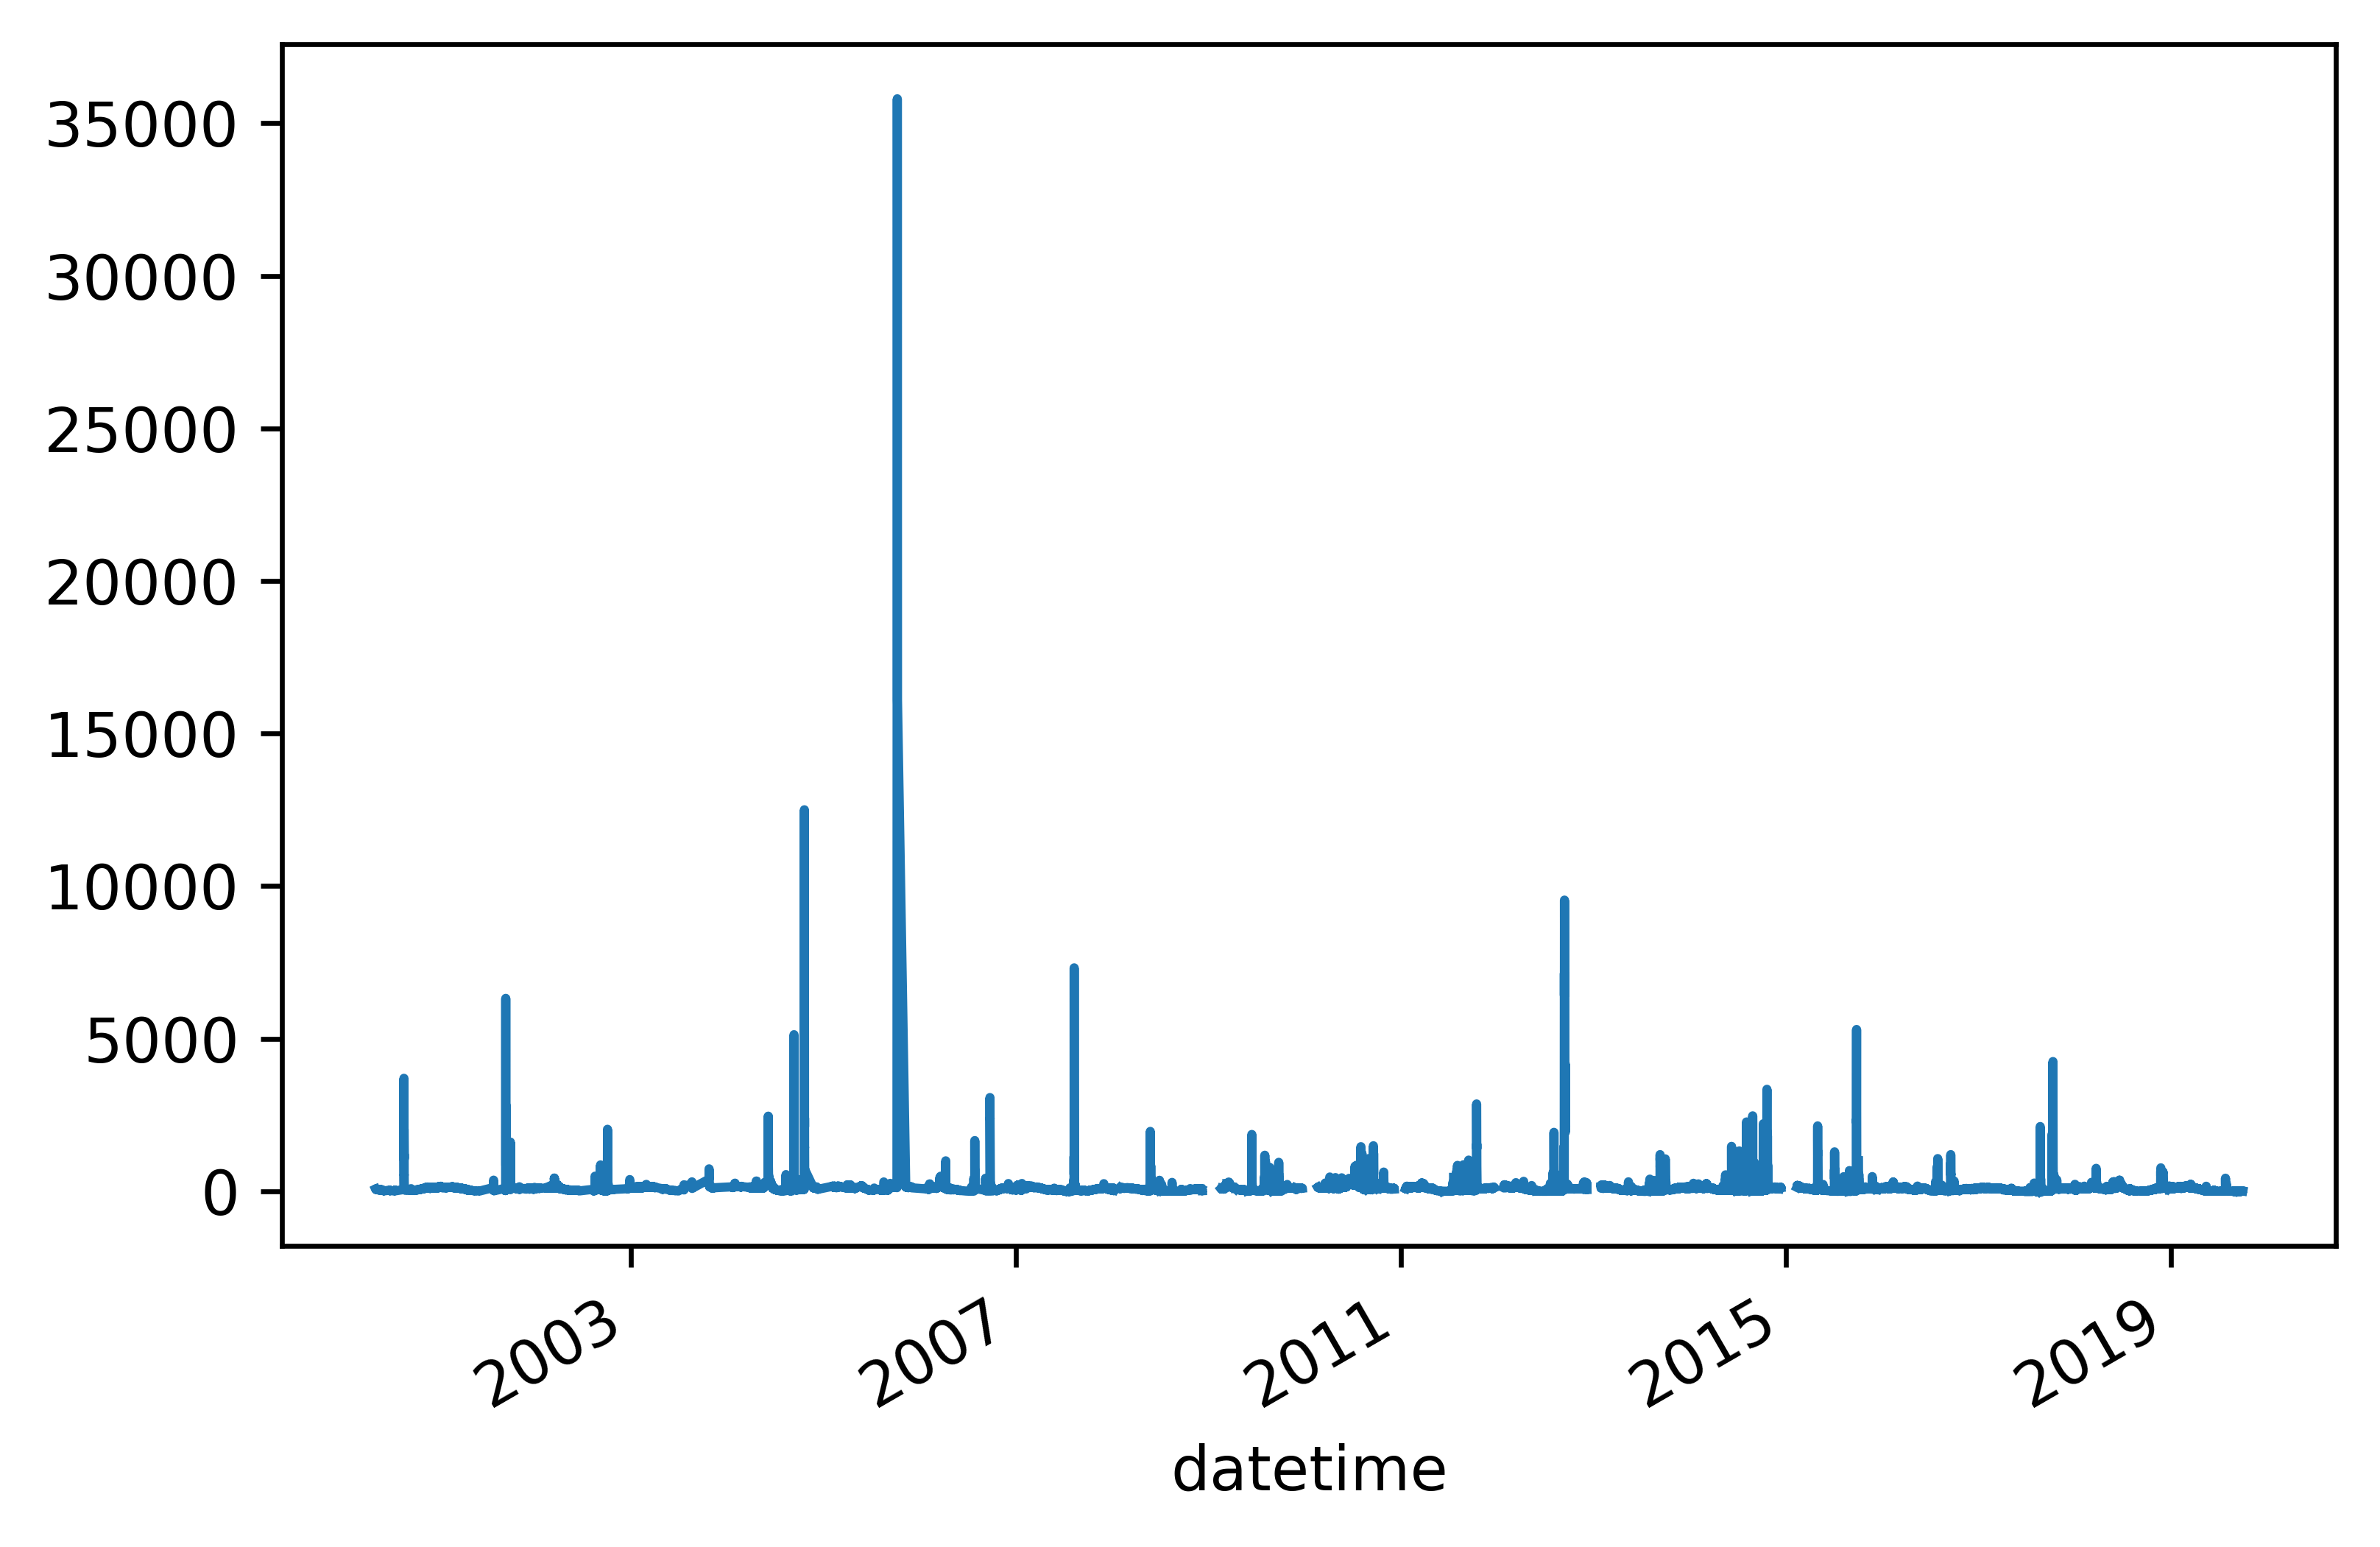

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=600)  # doctest: +SKIP
dd.cfs.plot()  # doctest: +SKIP

In [10]:
dd.cfs.describe()

count    493124.000000
mean        104.460537
std         477.341329
min           0.000000
25%          34.700000
50%          81.000000
75%         115.000000
max       35800.000000
Name: cfs, dtype: float64

In [11]:
(dd
 .cfs
 .loc['2018':]
)

datetime
2018-01-01 00:00:00-07:00    92.80
2018-01-01 00:15:00-07:00    88.30
2018-01-01 00:30:00-07:00    90.50
2018-01-01 00:45:00-07:00    90.50
2018-01-01 01:00:00-07:00    94.00
                             ...  
2020-09-28 08:30:00-06:00     9.53
2020-09-28 08:45:00-06:00     9.20
2020-09-28 09:00:00-06:00     9.20
2020-09-28 09:15:00-06:00     9.20
2020-09-28 09:30:00-06:00     9.20
Name: cfs, Length: 95886, dtype: float64

In [12]:
(dd
 .cfs
 .loc['2018/3':'2019/5']
)

datetime
2018-03-01 00:00:00-07:00    104.0
2018-03-01 00:15:00-07:00    107.0
2018-03-01 00:30:00-07:00    107.0
2018-03-01 00:45:00-07:00    105.0
2018-03-01 01:00:00-07:00    103.0
                             ...  
2019-05-31 22:45:00-06:00    121.0
2019-05-31 23:00:00-06:00    123.0
2019-05-31 23:15:00-06:00    123.0
2019-05-31 23:30:00-06:00    125.0
2019-05-31 23:45:00-06:00    123.0
Name: cfs, Length: 43862, dtype: float64

<AxesSubplot:xlabel='datetime'>

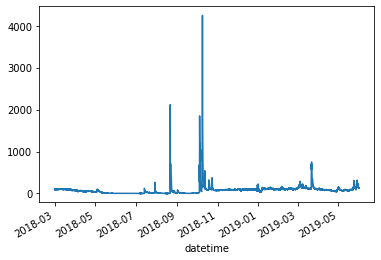

In [13]:
(dd   # doctest: +SKIP
 .cfs
 .loc['2018/3':'2019/5']
 .plot()
)

<AxesSubplot:xlabel='datetime'>

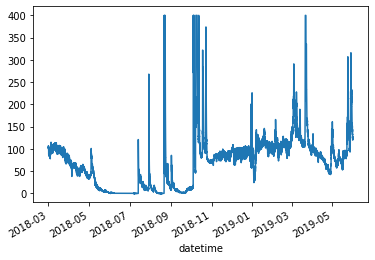

In [14]:
(dd   # doctest: +SKIP
 .cfs
 .loc['2018/3':'2019/5']
 .clip(upper=400)
 .plot()
)

In [15]:
dd2018 = (dd
 .cfs
 .loc['2018/3':'2019/5']
 .clip(upper=400))

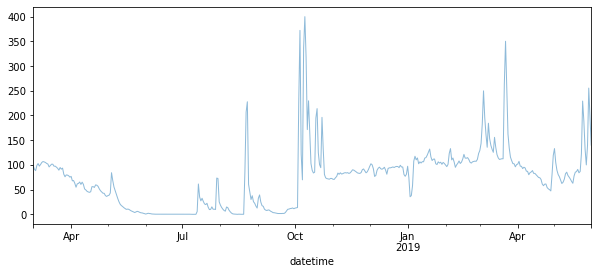

In [16]:
ax = (dd2018
 .resample('D')
 .mean()
 .plot(figsize=(10,4), alpha=.5, linewidth=1, label='Daily')
)

In [17]:
ax = (dd2018
 .resample('D')
 .mean()
 .rolling(7)
 .mean()
 .plot(figsize=(10,4), ax=ax, label='7-day Rolling')
)
ax.legend()
ax.set_title('Dirty Devil Flow 2018 (cfs)')

Text(0.5, 1.0, 'Dirty Devil Flow 2018 (cfs)')

In [18]:
(dd
  [['cfs']]
  .loc['2018/3':'2019/5']
  .query('cfs.isna()')
)

,cfs
datetime,
2018-07-07 13:15:00-06:00,NaN
2018-07-07 13:30:00-06:00,NaN
2018-07-07 13:45:00-06:00,NaN
2018-07-07 14:00:00-06:00,NaN
2018-07-07 14:15:00-06:00,NaN
...,...
2018-08-18 08:15:00-06:00,NaN
2018-08-18 08:30:00-06:00,NaN
2018-08-18 08:45:00-06:00,NaN


<AxesSubplot:xlabel='datetime'>

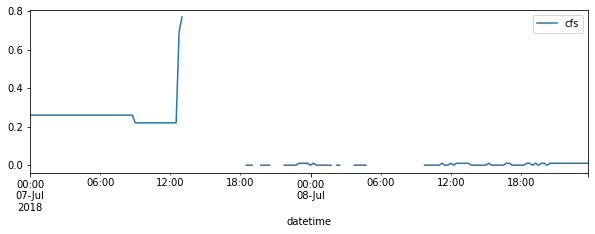

In [19]:
(dd     # doctest: +SKIP
  [['cfs']]
  .loc['2018/7/7':'2018/7/8']
  .plot(figsize=(10,3))
)

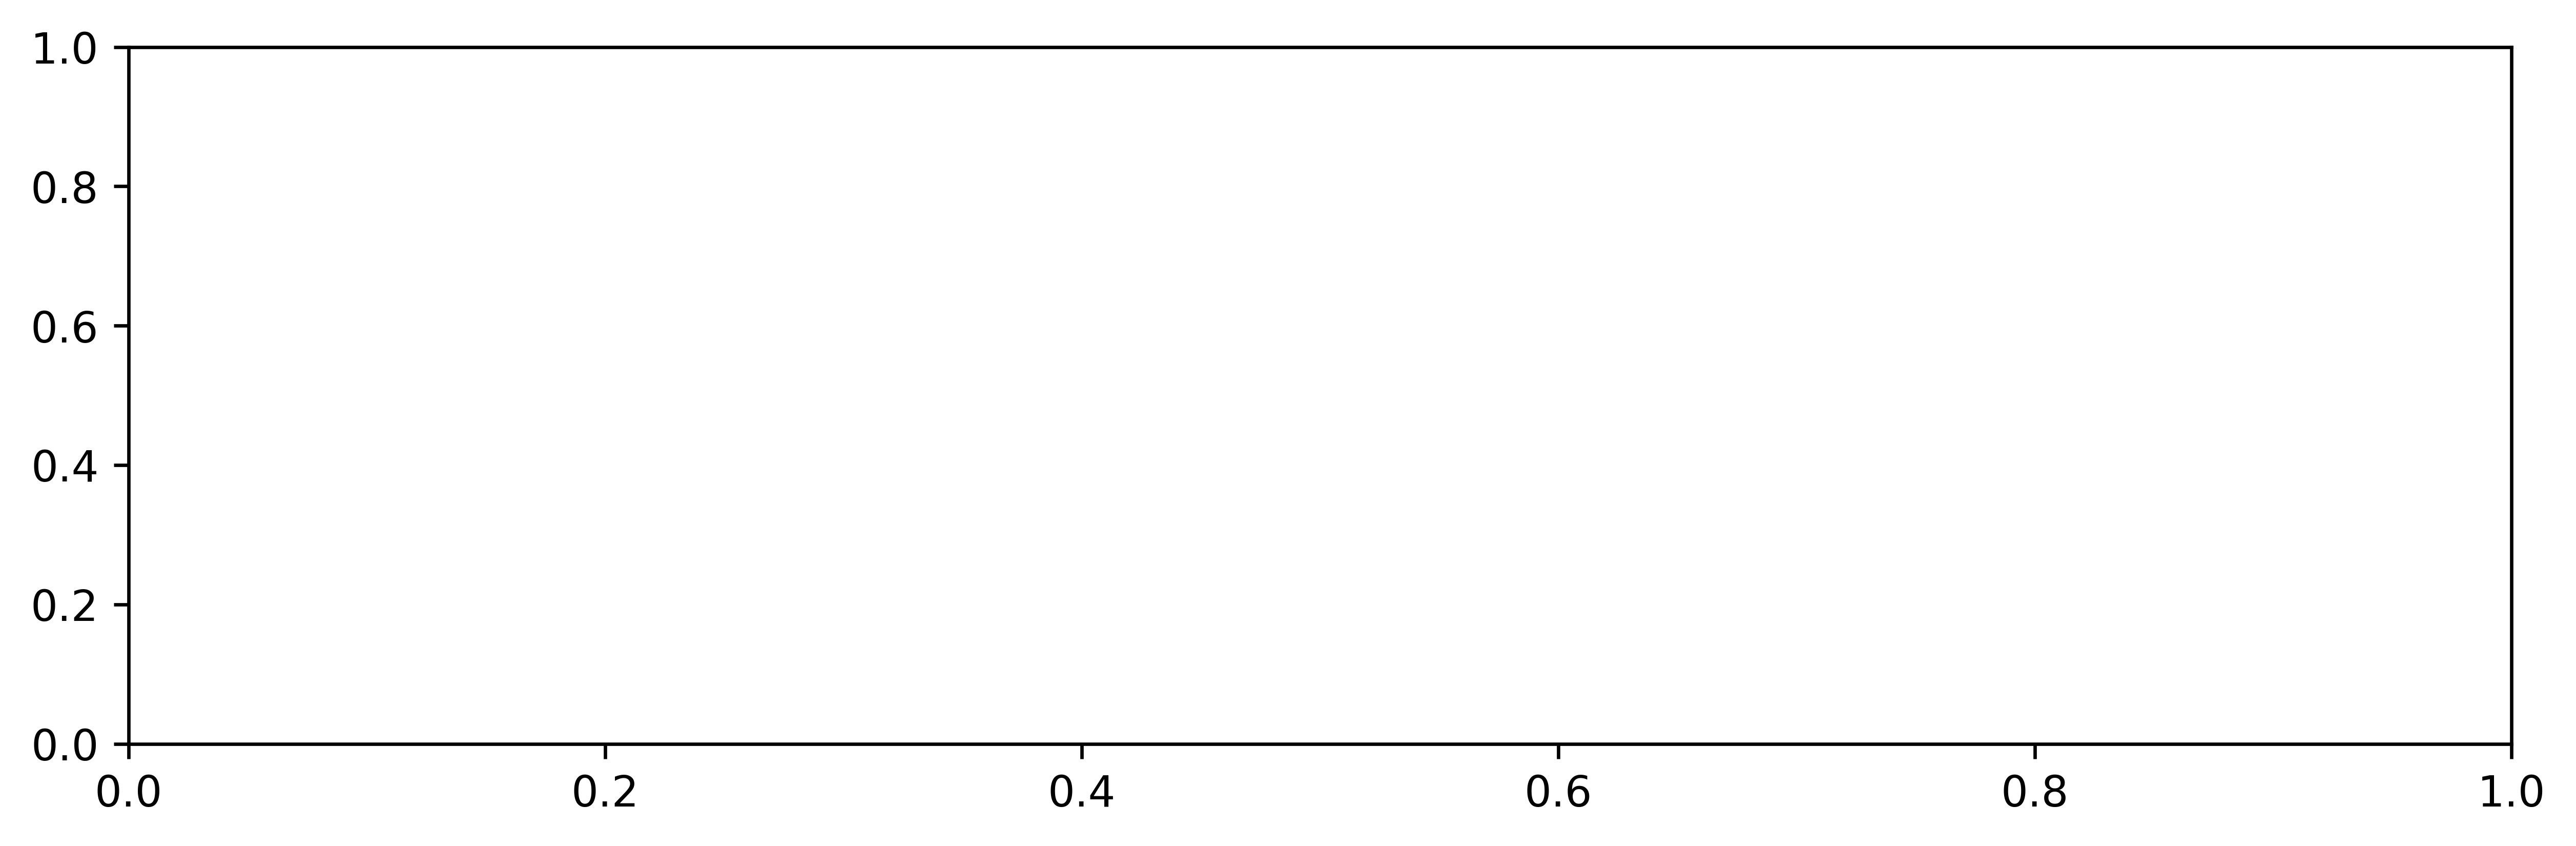

In [20]:
fig, ax = plt.subplots(dpi=600, figsize=(10,3))   # doctest: +SKIP
dd_july = (dd
 ['cfs']
 .loc['2018/7/7 11:00':'2018/7/7 20:00']
)

In [21]:
dd_july.plot(ax=ax, label='original', linewidth=2)   # doctest: +SKIP
(dd_july   # doctest: +SKIP
 .bfill()
 .add(.05)
 .plot(label='bfill', ax=ax, linewidth=.5))

<AxesSubplot:xlabel='datetime'>

In [22]:
(dd_july   # doctest: +SKIP
 .ffill()
 .add(.1)
 .plot(label='ffill', ax=ax, linewidth=.5))

<AxesSubplot:xlabel='datetime'>

In [23]:
(dd_july   # doctest: +SKIP
 .interpolate(method='polynomial', order=3)
 .add(.15)
 .plot(label='interpolate poly (order 3)', ax=ax, linewidth=.5))

<AxesSubplot:xlabel='datetime'>

In [24]:
(dd_july   # doctest: +SKIP
 .interpolate()
 .add(.2)
 .plot(label='interpolate default', ax=ax, linewidth=.5))

<AxesSubplot:xlabel='datetime'>

In [25]:
(dd_july   # doctest: +SKIP
 .interpolate(method='nearest')
 .add(.25)
 .plot(label='interpolate nearest', ax=ax, linewidth=.5))

<AxesSubplot:xlabel='datetime'>

In [26]:
(dd_july   # doctest: +SKIP
 .fillna(1)
 .add(.3)
 .plot(label='fillna 1', ax=ax, linewidth=.5))

<AxesSubplot:xlabel='datetime'>

In [27]:
ax.legend()   # doctest: +SKIP
ax.set_title('Missing Values Demo')   # doctest: +SKIP

Text(0.5, 1.0, 'Missing Values Demo')

In [28]:
(dd
 .groupby(dd.index.month)
 .cfs
 .describe()
)

,count,mean,std,min,25%,50%,75%,max
datetime,,,,,,,,
1,26011.0,117.268802,29.000354,24.30,101.00,114.0,132.0,265.0
2,41309.0,125.890293,24.280297,56.00,109.00,125.0,141.0,303.0
3,51807.0,127.037609,48.885942,60.30,100.00,116.0,136.0,750.0
4,50669.0,82.786214,74.133528,20.50,52.50,70.0,97.8,2140.0
5,49507.0,63.007851,68.791835,0.31,27.20,43.9,78.5,1960.0
6,41379.0,74.327241,139.857378,0.02,8.93,32.0,82.5,2460.0
7,37089.0,62.775011,115.285805,0.00,4.25,17.4,68.2,1660.0
8,37584.0,74.676246,247.800553,0.00,6.30,25.6,59.1,7320.0
9,42272.0,128.309332,546.921269,0.00,7.55,20.0,55.9,9540.0


<AxesSubplot:xlabel='datetime'>

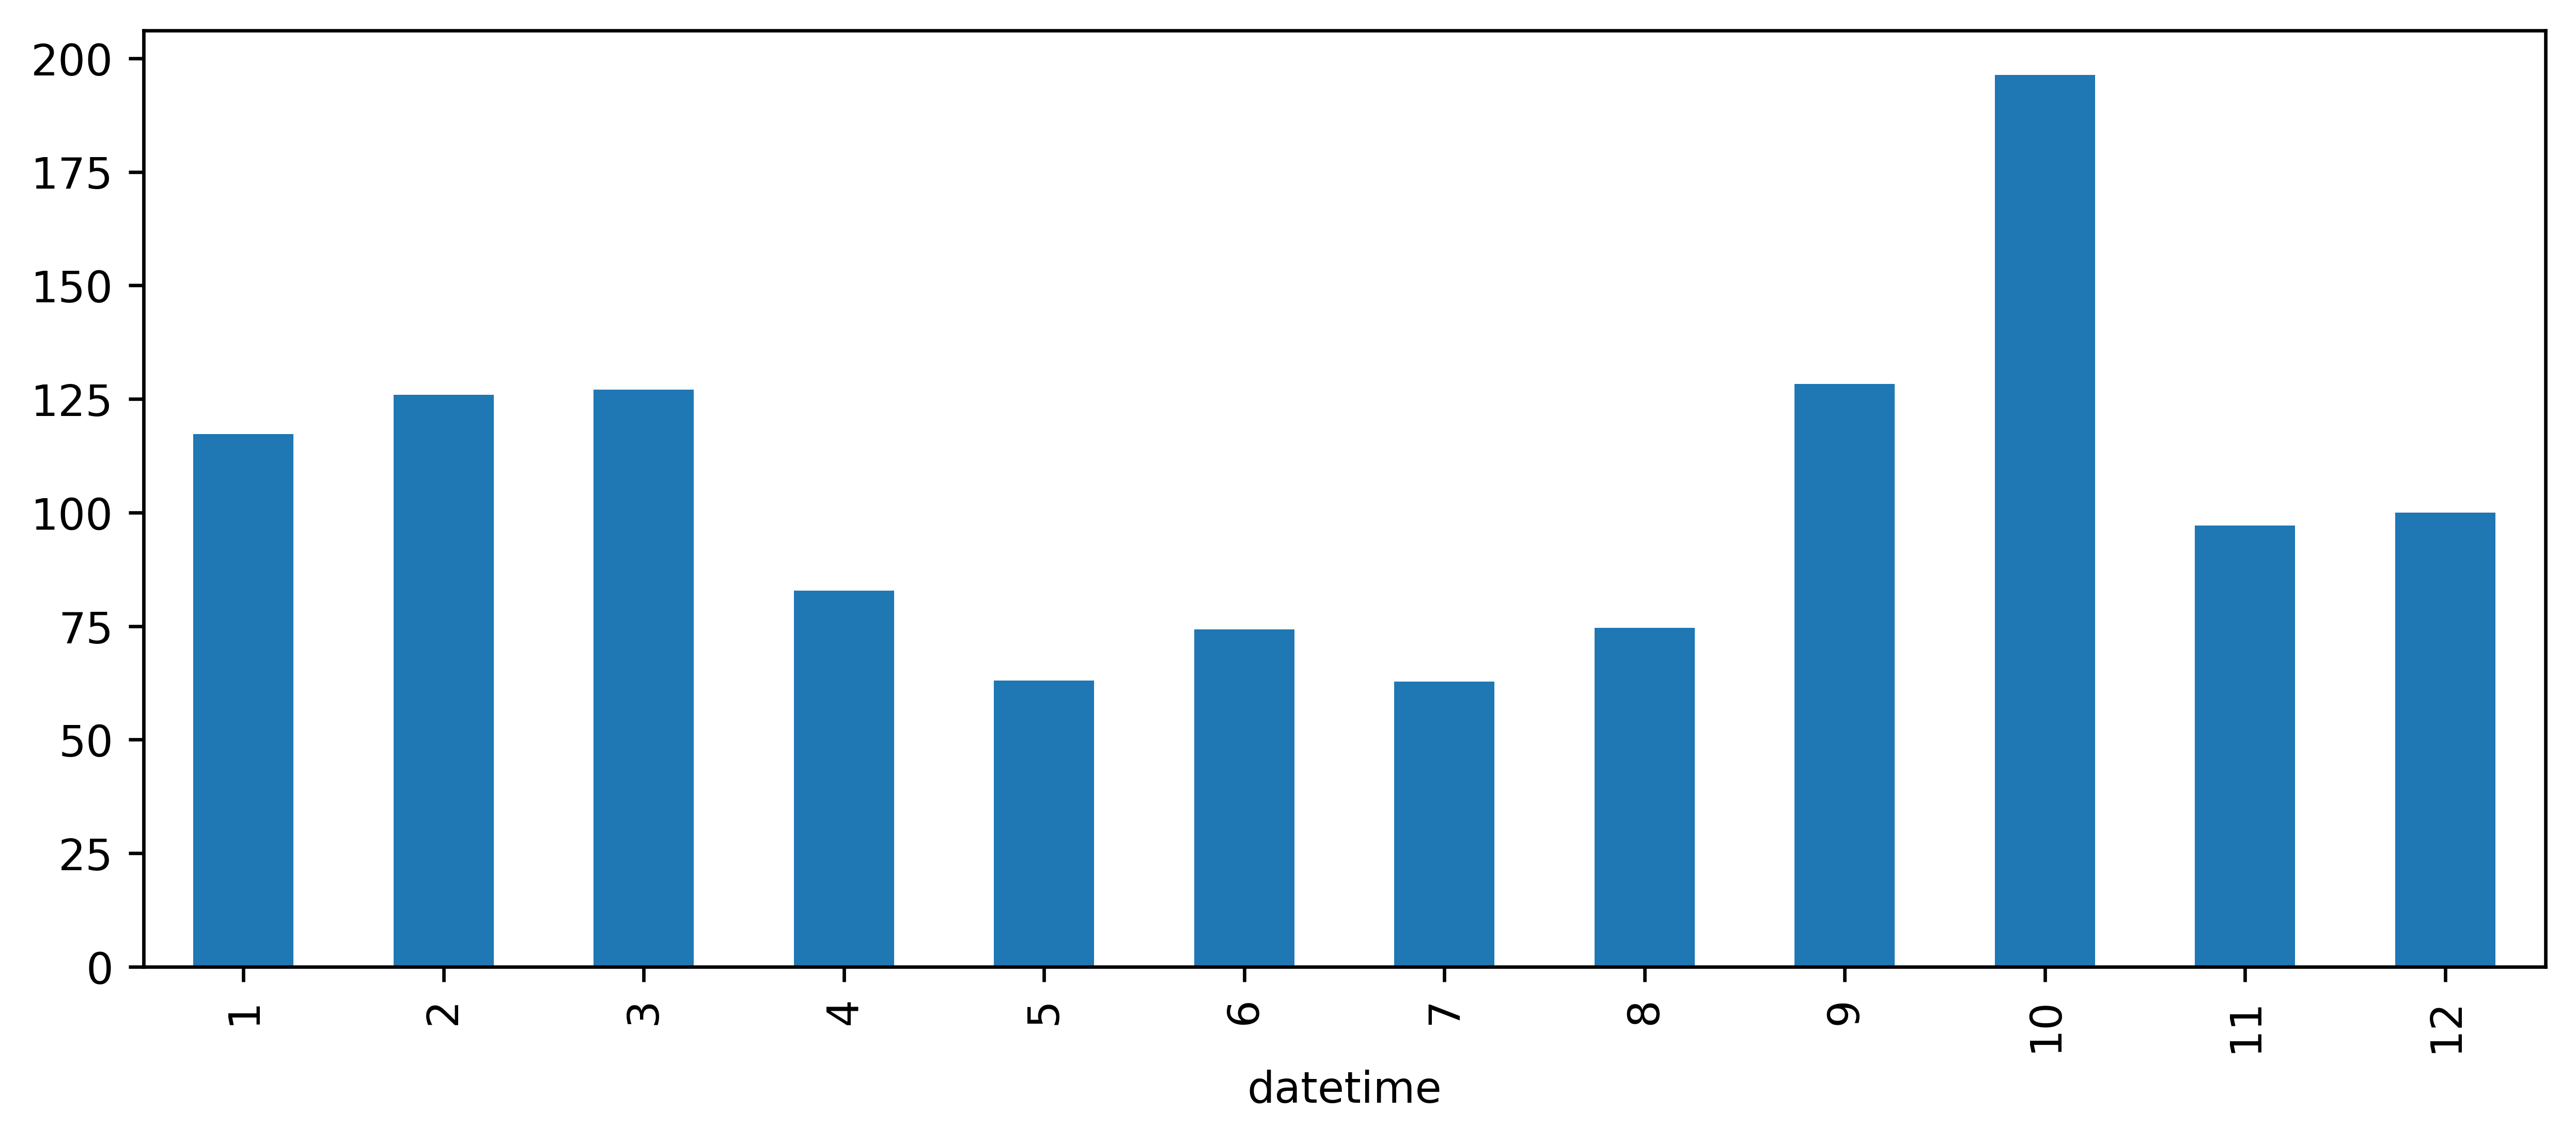

In [29]:
fig, ax = plt.subplots(dpi=600, figsize=(10,4)) # doctest: +SKIP
(dd  # doctest: +SKIP
 .groupby(dd.index.month)
 ['cfs']
 .describe()
 ['mean']
 .plot.bar(ax=ax)
)

<AxesSubplot:xlabel='datetime'>

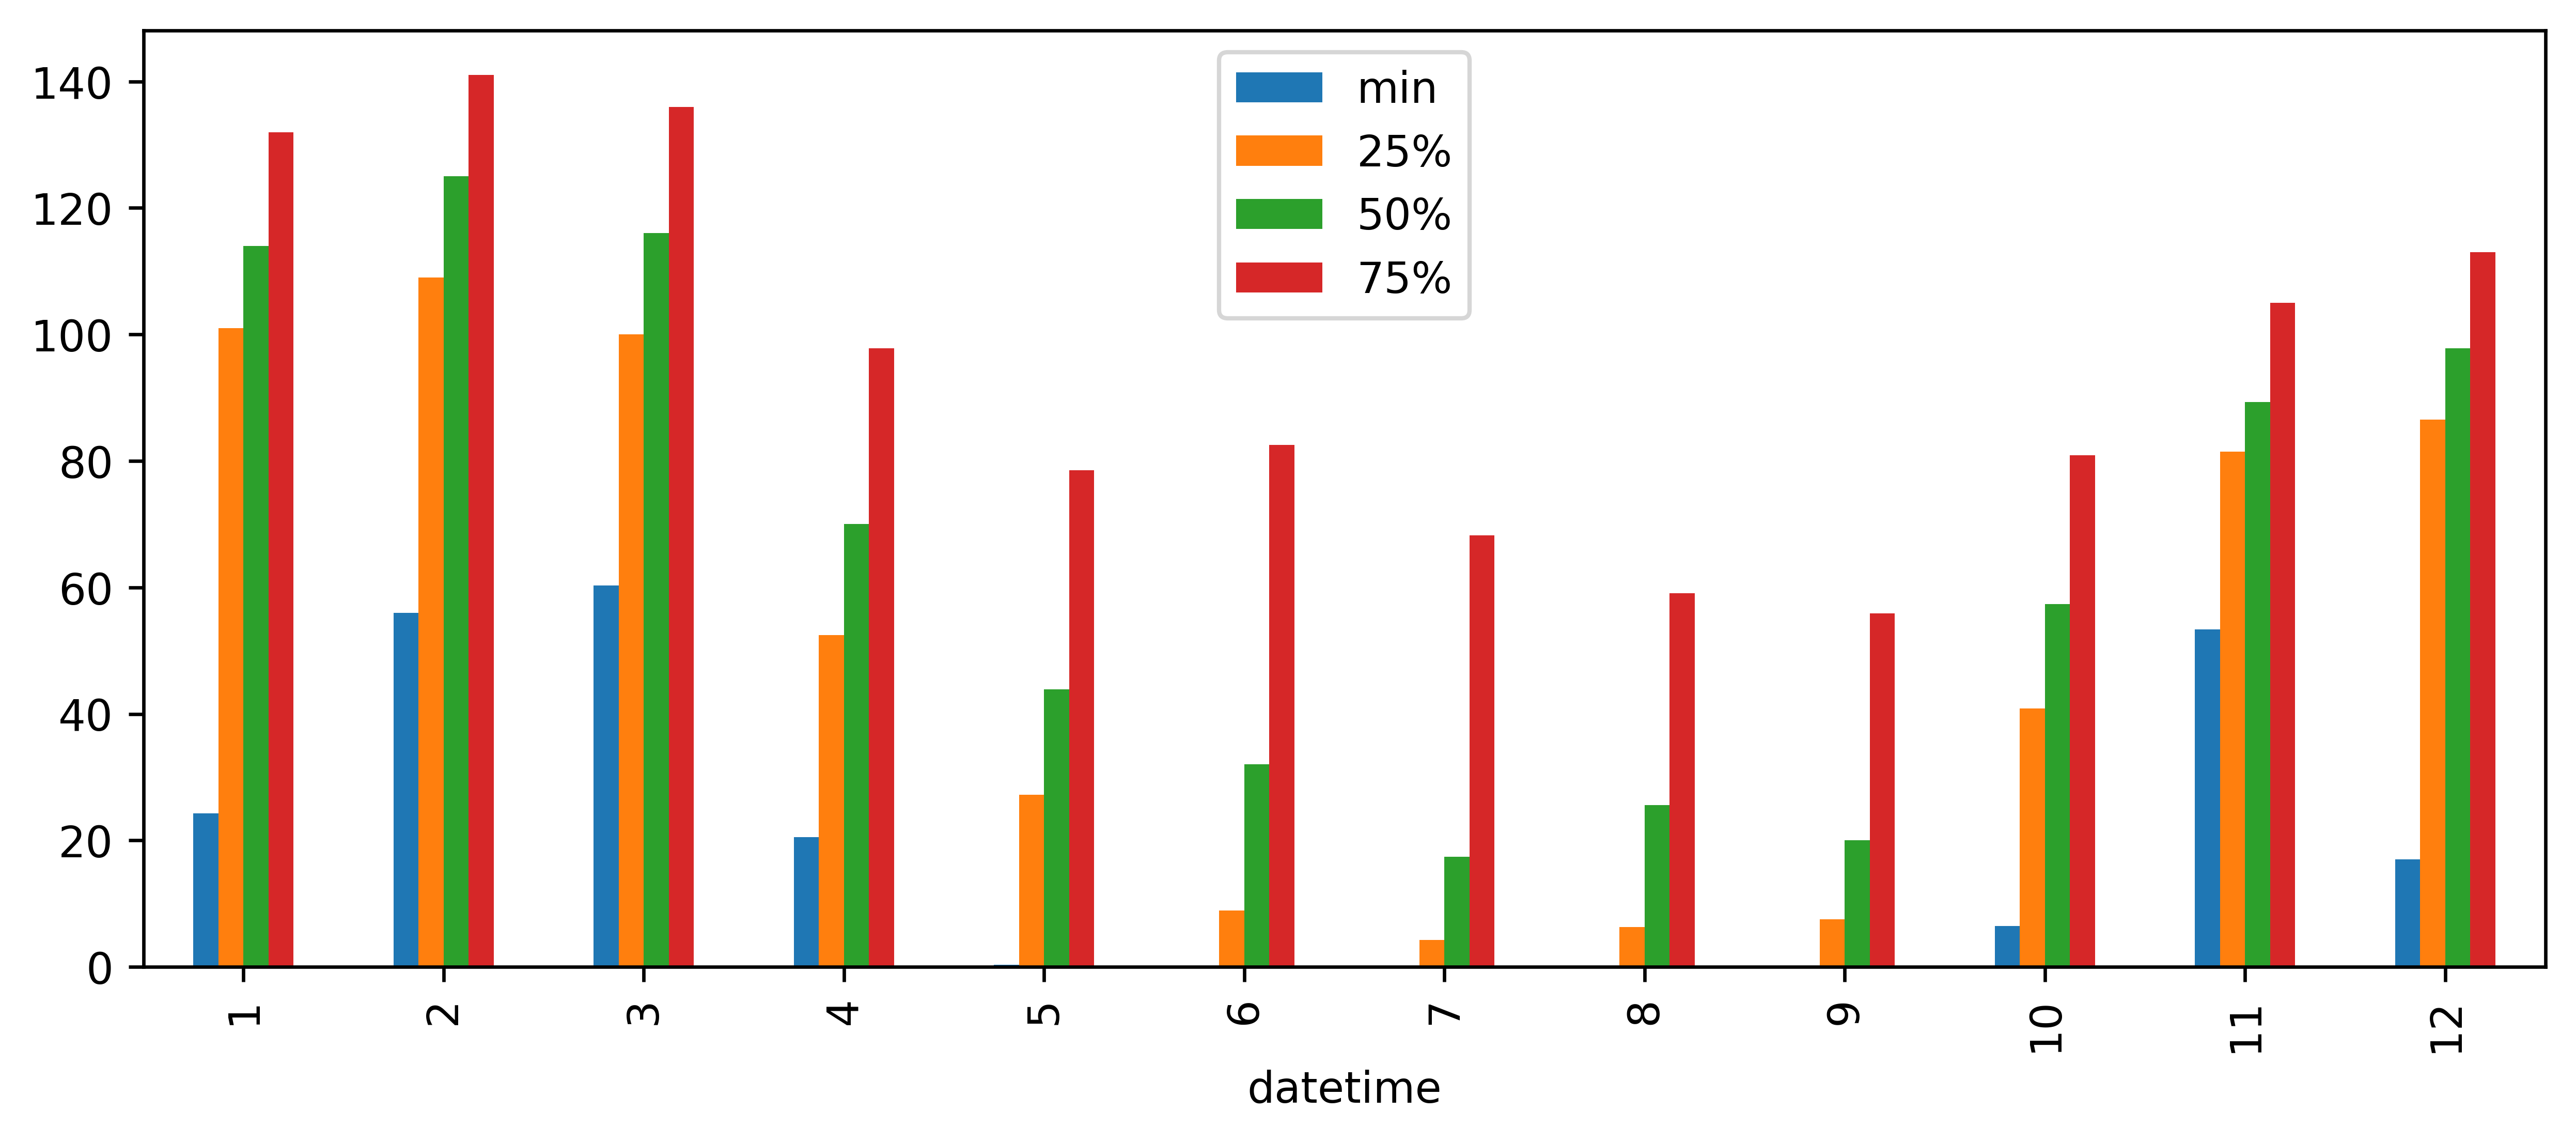

In [30]:
fig, ax = plt.subplots(dpi=600, figsize=(10,4))  # doctest: +SKIP
(dd  # doctest: +SKIP
 .groupby(dd.index.month)
 ['cfs']
 .describe()
 .loc[:, 'min':'75%']
 .plot.bar(ax=ax)
)

<AxesSubplot:xlabel='Month', ylabel='cfs'>

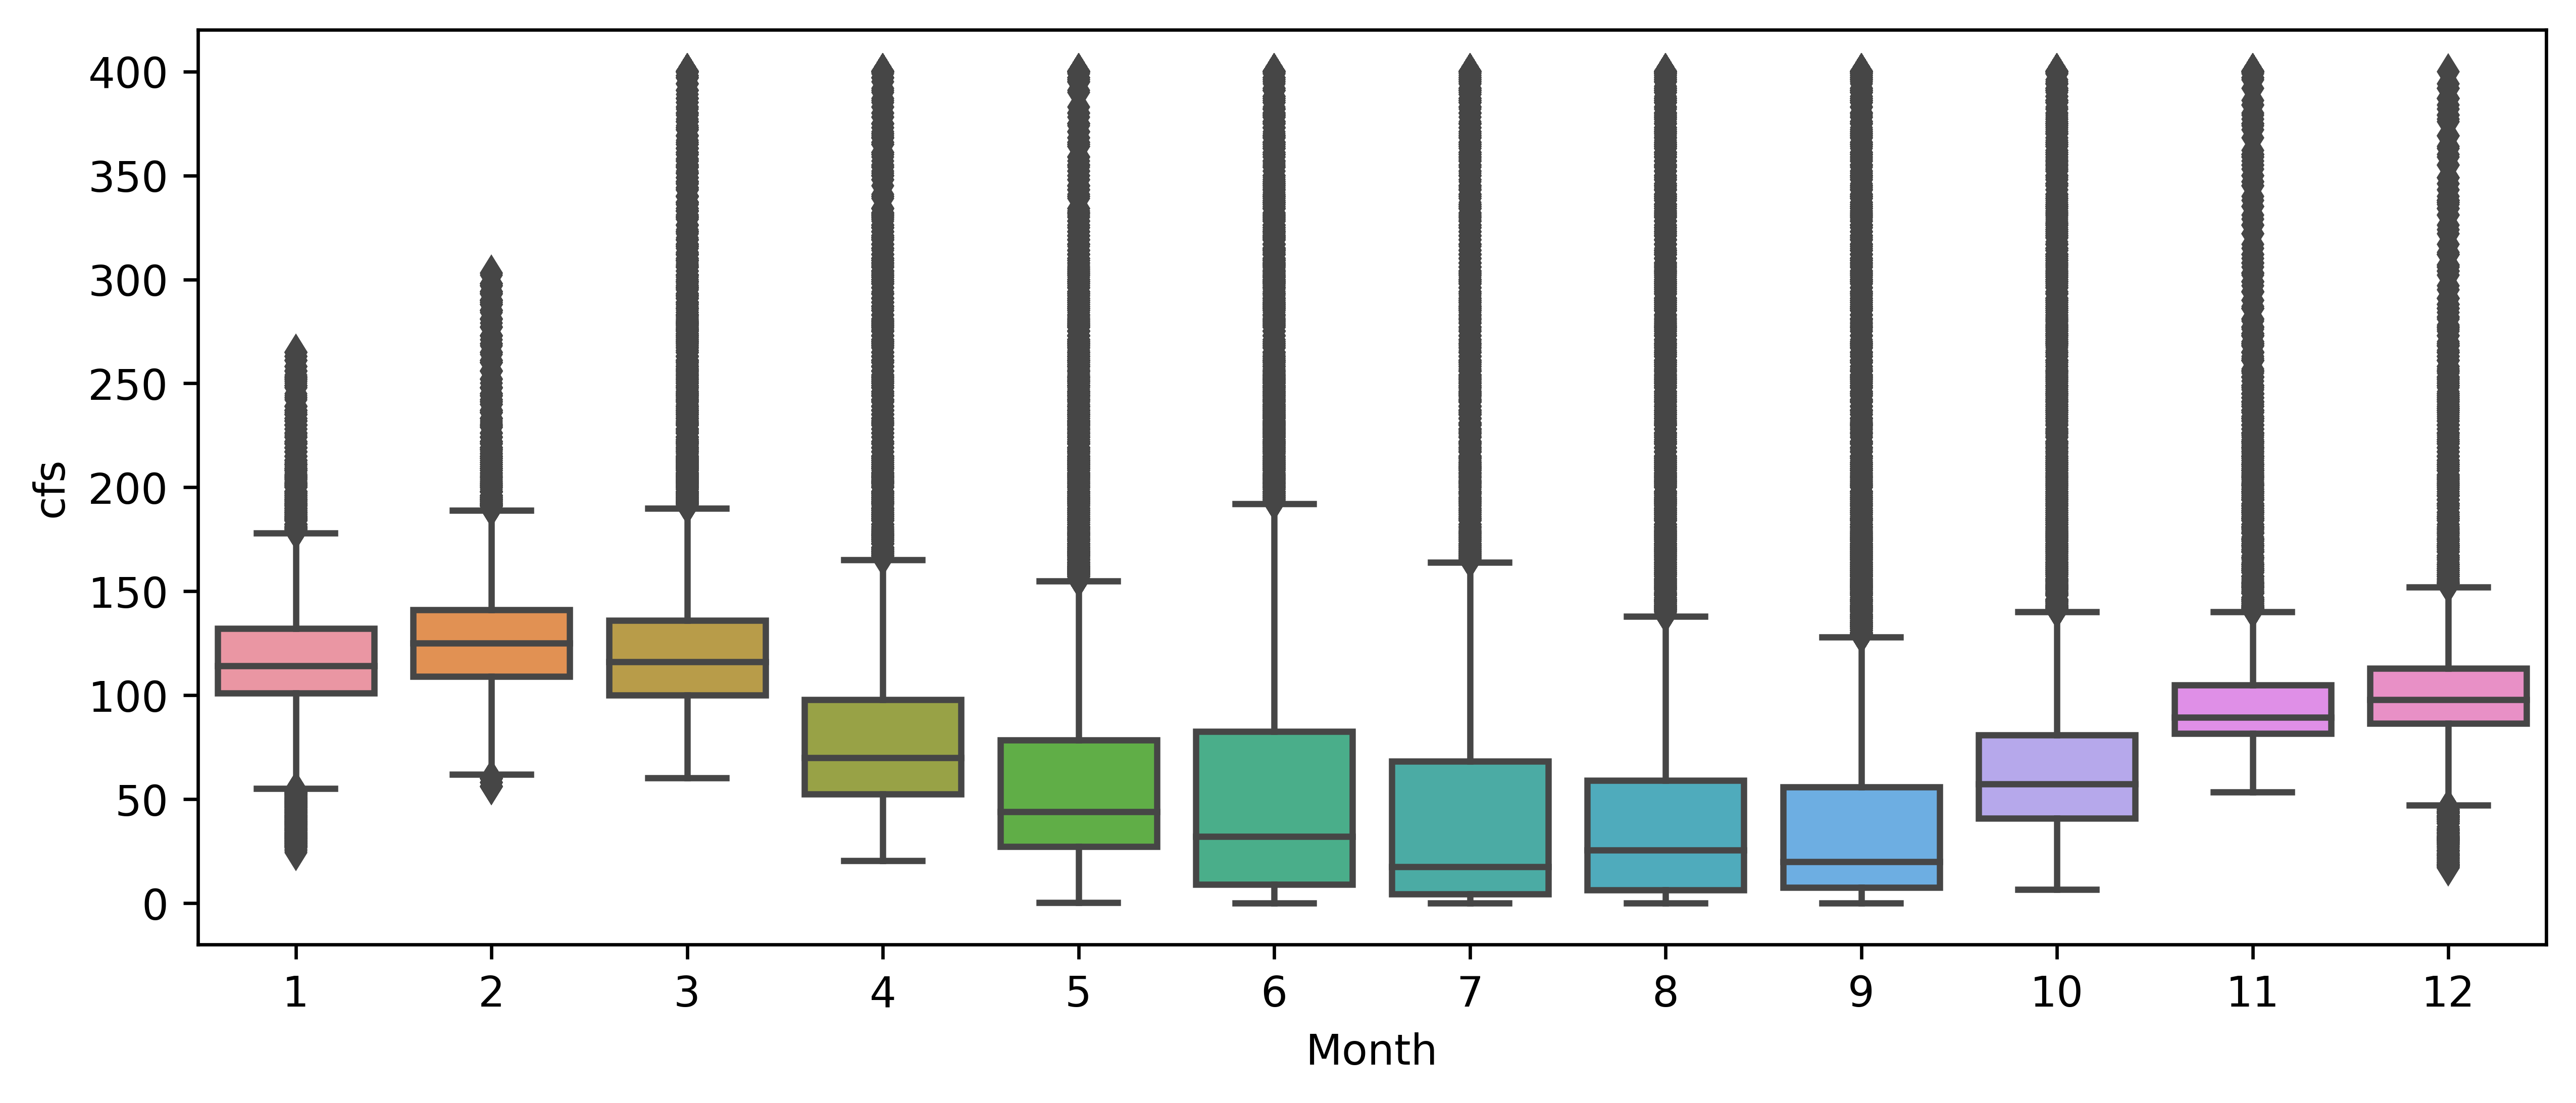

In [31]:
import seaborn as sns
fig, ax = plt.subplots(dpi=600, figsize=(10,4))   # doctest: +SKIP
sns.boxplot(data=dd.assign(cfs=dd.cfs.clip(upper=400)),   # doctest: +SKIP
   x=dd.index.month.rename('Month'), y='cfs', ax=ax)

In [32]:
dd.cfs

datetime
2001-05-07 01:00:00-06:00    71.00
2001-05-07 01:15:00-06:00    71.00
2001-05-07 01:30:00-06:00    71.00
2001-05-07 01:45:00-06:00    70.00
2001-05-07 02:00:00-06:00    70.00
                             ...  
2020-09-28 08:30:00-06:00     9.53
2020-09-28 08:45:00-06:00     9.20
2020-09-28 09:00:00-06:00     9.20
2020-09-28 09:15:00-06:00     9.20
2020-09-28 09:30:00-06:00     9.20
Name: cfs, Length: 539305, dtype: float64

In [33]:
(dd
  .resample('D')
  .median()
)

,site_no,cfs,gage_height
datetime,,,
2001-05-07 00:00:00-06:00,9333500.0,71.50,NaN
2001-05-08 00:00:00-06:00,9333500.0,69.00,NaN
2001-05-09 00:00:00-06:00,9333500.0,63.50,NaN
2001-05-10 00:00:00-06:00,9333500.0,55.00,NaN
2001-05-11 00:00:00-06:00,9333500.0,55.00,NaN
...,...,...,...
2020-09-24 00:00:00-06:00,9333500.0,9.53,6.16
2020-09-25 00:00:00-06:00,9333500.0,10.20,6.18
2020-09-26 00:00:00-06:00,9333500.0,10.90,6.20


In [34]:
(dd
  .resample('2D')
  .median()
)

,site_no,cfs,gage_height
datetime,,,
2001-05-07 00:00:00-06:00,9333500.0,69.00,NaN
2001-05-09 00:00:00-06:00,9333500.0,56.00,NaN
2001-05-11 00:00:00-06:00,9333500.0,54.00,NaN
2001-05-13 00:00:00-06:00,9333500.0,47.00,NaN
2001-05-15 00:00:00-06:00,9333500.0,54.00,NaN
...,...,...,...
2020-09-20 00:00:00-06:00,9333500.0,6.83,6.07
2020-09-22 00:00:00-06:00,9333500.0,7.68,6.10
2020-09-24 00:00:00-06:00,9333500.0,9.86,6.17


In [35]:
(dd
  .resample('3D2H10min')
  .median()
)

,site_no,cfs,gage_height
datetime,,,
2001-05-07 00:00:00-06:00,9333500.0,67.00,NaN
2001-05-10 02:10:00-06:00,9333500.0,55.00,NaN
2001-05-13 04:20:00-06:00,9333500.0,49.00,NaN
2001-05-16 06:30:00-06:00,9333500.0,50.00,NaN
2001-05-19 08:40:00-06:00,9333500.0,46.00,NaN
...,...,...,...
2020-09-14 13:20:00-06:00,9333500.0,5.79,6.030
2020-09-17 15:30:00-06:00,9333500.0,6.04,6.040
2020-09-20 17:40:00-06:00,9333500.0,7.11,6.080


In [36]:
(dd
  .resample('Q')
  .median()
)

,site_no,cfs,gage_height
datetime,,,
2001-06-30 00:00:00-06:00,9333500.0,44.00,NaN
2001-09-30 00:00:00-06:00,9333500.0,27.00,NaN
2001-12-31 00:00:00-07:00,9333500.0,85.00,NaN
2002-03-31 00:00:00-07:00,9333500.0,122.00,NaN
2002-06-30 00:00:00-06:00,9333500.0,46.00,NaN
...,...,...,...
2019-09-30 00:00:00-06:00,9333500.0,13.30,6.21
2019-12-31 00:00:00-07:00,9333500.0,92.10,6.75
2020-03-31 00:00:00-06:00,9333500.0,126.00,6.99


In [37]:
(dd
  .resample('Q-JAN')
  .median()
)

,site_no,cfs,gage_height
datetime,,,
2001-07-31 00:00:00-06:00,9333500.0,42.0,NaN
2001-10-31 00:00:00-07:00,9333500.0,39.0,NaN
2002-01-31 00:00:00-07:00,9333500.0,116.0,NaN
2002-04-30 00:00:00-06:00,9333500.0,96.0,NaN
2002-07-31 00:00:00-06:00,9333500.0,13.0,NaN
...,...,...,...
2019-10-31 00:00:00-06:00,9333500.0,12.8,6.25
2020-01-31 00:00:00-07:00,9333500.0,116.0,6.84
2020-04-30 00:00:00-06:00,9333500.0,116.0,6.98


In [38]:
(dd
  .resample('2min')
  .median()
)

,site_no,cfs,gage_height
datetime,,,
2001-05-07 01:00:00-06:00,9333500.0,71.0,NaN
2001-05-07 01:02:00-06:00,NaN,NaN,NaN
2001-05-07 01:04:00-06:00,NaN,NaN,NaN
2001-05-07 01:06:00-06:00,NaN,NaN,NaN
2001-05-07 01:08:00-06:00,NaN,NaN,NaN
...,...,...,...
2020-09-28 09:22:00-06:00,NaN,NaN,NaN
2020-09-28 09:24:00-06:00,NaN,NaN,NaN
2020-09-28 09:26:00-06:00,NaN,NaN,NaN


In [39]:
(dd
  .resample('2min')
  .median()
  .interpolate()
)

,site_no,cfs,gage_height
datetime,,,
2001-05-07 01:00:00-06:00,9333500.0,71.0,NaN
2001-05-07 01:02:00-06:00,9333500.0,71.0,NaN
2001-05-07 01:04:00-06:00,9333500.0,71.0,NaN
2001-05-07 01:06:00-06:00,9333500.0,71.0,NaN
2001-05-07 01:08:00-06:00,9333500.0,71.0,NaN
...,...,...,...
2020-09-28 09:22:00-06:00,9333500.0,9.2,6.15
2020-09-28 09:24:00-06:00,9333500.0,9.2,6.15
2020-09-28 09:26:00-06:00,9333500.0,9.2,6.15


In [40]:
(dd
  .resample('Q-JAN')
  .median()
)

,site_no,cfs,gage_height
datetime,,,
2001-07-31 00:00:00-06:00,9333500.0,42.0,NaN
2001-10-31 00:00:00-07:00,9333500.0,39.0,NaN
2002-01-31 00:00:00-07:00,9333500.0,116.0,NaN
2002-04-30 00:00:00-06:00,9333500.0,96.0,NaN
2002-07-31 00:00:00-06:00,9333500.0,13.0,NaN
...,...,...,...
2019-10-31 00:00:00-06:00,9333500.0,12.8,6.25
2020-01-31 00:00:00-07:00,9333500.0,116.0,6.84
2020-04-30 00:00:00-06:00,9333500.0,116.0,6.98


In [41]:
(dd
  .reset_index()
  .groupby(pd.Grouper(key='datetime', freq='Q-JAN'))
  .median()
)

,site_no,cfs,gage_height
datetime,,,
2001-07-31 00:00:00-06:00,9333500.0,42.0,NaN
2001-10-31 00:00:00-07:00,9333500.0,39.0,NaN
2002-01-31 00:00:00-07:00,9333500.0,116.0,NaN
2002-04-30 00:00:00-06:00,9333500.0,96.0,NaN
2002-07-31 00:00:00-06:00,9333500.0,13.0,NaN
...,...,...,...
2019-10-31 00:00:00-06:00,9333500.0,12.8,6.25
2020-01-31 00:00:00-07:00,9333500.0,116.0,6.84
2020-04-30 00:00:00-06:00,9333500.0,116.0,6.98
